# Exploaration Project 01. Rock Paper Scissors Classifier

## 00. get dataset
- 구글의 [teachable machine 사이트](https://teachablemachine.withgoogle.com/)를 이용해서 가위바위보 사진을 촬영한다.
- 촬영한 이미지의 크기를 224x224 => 28x28로 변경한다.

In [8]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
# !pip install pillow   

from PIL import Image
import os, glob
import numpy as np

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [4]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/project/Project_AIFFEL/dataset/rock_scissors_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/project/Project_AIFFEL/dataset/rock_scissors_paper/rock
바위 이미지 resize 완료!


In [5]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/project/Project_AIFFEL/dataset/rock_scissors_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/project/Project_AIFFEL/dataset/rock_scissors_paper/paper
보 이미지 resize 완료!


In [6]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/project/Project_AIFFEL/dataset/rock_scissors_paper/scissors"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/project/Project_AIFFEL/dataset/rock_scissors_paper/scissors
가위 이미지 resize 완료!


## 01. load data
- load_data 함수를 만들어 데이터를 불러온다.
- 이미지와 정답 데이터를 담을 행렬을 미리 만든다.
- 이미지가 담겨있는 폴더에서 이미지를 불러와 행렬에 저장한다.(for loop사용)

In [28]:
from sklearn import model_selection

In [30]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=3000   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/project/Project_AIFFEL/dataset/rock_scissors_paper/"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train_norm, y_train, test_size=0.2)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train shape: (2400, 28, 28, 3)
y_train shape: (2400,)


- 이미지 출력

라벨:  0


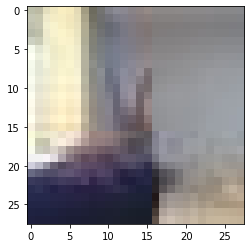

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [ ]:
print()

## 02. build Deep Learning network

In [11]:
import tensorflow as tf
from tensorflow import keras


model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_3/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](max_pooling2d_2/Identity, conv2d_3/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [3,3,64,128].

**trouble**
- 레이어를 많이 쌓으려고 했는데, Convolution 연산을 여러번 하기에 28x28 사이즈의 이미지는 많이 작았다. 
- 3번 연산을 한 후의 output shape이 (None, 1, 1, 64)로 더이상 연산을 할 수 없어서 Error발생
- 28x28 사이즈의 이미지에서는 (3,3) convolution연산이 최대 3번만 가능하다.   

**output shape 계산 방법**
- keras의 Conv2D의 default stride = 1
- (n x n)의 convolution layer라고 가정
- (m x m x colour channel)의 input shape라고 가정 
- output shape = (m - n + 1) x (m - n + 1)
- **만약** stride = 3 이라면, output shape = (m - n + 1)/3 x (m - n + 1)/3     

**네트워크 설계하기**
- 계산 가능한 수의 레이어를 쌓았다.
- 최종 dense layer는 가위, 바위, 보 3개의 class이므로 3을 넣는다.
- activation : 최종 dense layer에는 softmax를 사용해 multi classification이 가능하게 한다. 

In [35]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              

## 03. train data with your network
- model.compile(), model.fit()을 이용한다.

In [36]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=200, validation_data=(x_valid, y_valid))

Epoch 1/200
75/75 [==============================] - 3s 40ms/step - loss: 1.0913 - accuracy: 0.3617 - val_loss: 1.0657 - val_accuracy: 0.4567
Epoch 2/200
75/75 [==============================] - 0s 2ms/step - loss: 0.9665 - accuracy: 0.5050 - val_loss: 0.8684 - val_accuracy: 0.5650
Epoch 3/200
75/75 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.6875 - val_loss: 0.6685 - val_accuracy: 0.7450
Epoch 4/200
75/75 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.7967 - val_loss: 0.5048 - val_accuracy: 0.8233
Epoch 5/200
75/75 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8683 - val_loss: 0.3965 - val_accuracy: 0.8183
Epoch 6/200
75/75 [==============================] - 0s 2ms/step - loss: 0.2954 - accuracy: 0.8846 - val_loss: 0.2903 - val_accuracy: 0.9000
Epoch 7/200
75/75 [==============================] - 0s 2ms/step - loss: 0.1836 - accuracy: 0.9438 - val_loss: 0.3018 - val_accuracy: 0.8983
Epoch 8/200


Epoch 58/200
75/75 [==============================] - 0s 2ms/step - loss: 4.3277e-05 - accuracy: 1.0000 - val_loss: 0.1304 - val_accuracy: 0.9817
Epoch 59/200
75/75 [==============================] - 0s 2ms/step - loss: 4.1403e-05 - accuracy: 1.0000 - val_loss: 0.1307 - val_accuracy: 0.9817
Epoch 60/200
75/75 [==============================] - 0s 2ms/step - loss: 3.9564e-05 - accuracy: 1.0000 - val_loss: 0.1314 - val_accuracy: 0.9817
Epoch 61/200
75/75 [==============================] - 0s 2ms/step - loss: 3.7198e-05 - accuracy: 1.0000 - val_loss: 0.1319 - val_accuracy: 0.9817
Epoch 62/200
75/75 [==============================] - 0s 2ms/step - loss: 3.5343e-05 - accuracy: 1.0000 - val_loss: 0.1325 - val_accuracy: 0.9817
Epoch 63/200
75/75 [==============================] - 0s 2ms/step - loss: 3.4111e-05 - accuracy: 1.0000 - val_loss: 0.1348 - val_accuracy: 0.9817
Epoch 64/200
75/75 [==============================] - 0s 2ms/step - loss: 3.2204e-05 - accuracy: 1.0000 - val_loss: 0.1340 -

75/75 [==============================] - 0s 2ms/step - loss: 3.1059e-06 - accuracy: 1.0000 - val_loss: 0.1562 - val_accuracy: 0.9817
Epoch 115/200
75/75 [==============================] - 0s 2ms/step - loss: 2.9946e-06 - accuracy: 1.0000 - val_loss: 0.1561 - val_accuracy: 0.9817
Epoch 116/200
75/75 [==============================] - 0s 2ms/step - loss: 2.8362e-06 - accuracy: 1.0000 - val_loss: 0.1574 - val_accuracy: 0.9817
Epoch 117/200
75/75 [==============================] - 0s 2ms/step - loss: 2.6642e-06 - accuracy: 1.0000 - val_loss: 0.1582 - val_accuracy: 0.9817
Epoch 118/200
75/75 [==============================] - 0s 2ms/step - loss: 2.6531e-06 - accuracy: 1.0000 - val_loss: 0.1580 - val_accuracy: 0.9817
Epoch 119/200
75/75 [==============================] - 0s 2ms/step - loss: 2.4849e-06 - accuracy: 1.0000 - val_loss: 0.1586 - val_accuracy: 0.9817
Epoch 120/200
75/75 [==============================] - 0s 2ms/step - loss: 2.3474e-06 - accuracy: 1.0000 - val_loss: 0.1588 - val_ac

Epoch 170/200
75/75 [==============================] - 0s 2ms/step - loss: 2.0171e-07 - accuracy: 1.0000 - val_loss: 0.1797 - val_accuracy: 0.9833
Epoch 171/200
75/75 [==============================] - 0s 2ms/step - loss: 1.9376e-07 - accuracy: 1.0000 - val_loss: 0.1801 - val_accuracy: 0.9817
Epoch 172/200
75/75 [==============================] - 0s 2ms/step - loss: 1.8567e-07 - accuracy: 1.0000 - val_loss: 0.1805 - val_accuracy: 0.9833
Epoch 173/200
75/75 [==============================] - 0s 2ms/step - loss: 1.7638e-07 - accuracy: 1.0000 - val_loss: 0.1810 - val_accuracy: 0.9833
Epoch 174/200
75/75 [==============================] - 0s 2ms/step - loss: 1.6515e-07 - accuracy: 1.0000 - val_loss: 0.1821 - val_accuracy: 0.9817
Epoch 175/200
75/75 [==============================] - 0s 2ms/step - loss: 1.5870e-07 - accuracy: 1.0000 - val_loss: 0.1817 - val_accuracy: 0.9833
Epoch 176/200
75/75 [==============================] - 0s 2ms/step - loss: 1.5154e-07 - accuracy: 1.0000 - val_loss: 0

## 04. evaluate your network with test data
- test data를 로드해 dataset을 train과 같이 만들어준다.

In [27]:
def load_test_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("평가데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/project/Project_AIFFEL/dataset/rock_scissors_paper_test/"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (3000, 28, 28, 3)
y_test shape: (3000,)


- model.evaluate()로 평가한다.

In [38]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

94/94 - 0s - loss: 18.6495 - accuracy: 0.0353
test_loss: 18.649517059326172 
test_accuracy: 0.03533333167433739


## test_accuracy를 높이자
1. test_accuracy: 0.31333333253860474   
    : train data 수가 300개로 test data와 같아서 test 정확도가 train_accuracy(1.0)에 비해 현저히 낮은 것으로 추정된다. 
2. test_accuracy: 0.3333333432674408
    : train data 300 -> 1200으로 늘렸으나 미미하게 올라감
3. test_accuracy: 0.36666667461395264
    : train data 1200 -> 3000으로 늘렸으나 미미하게 올라감
    => validation split을 해보자!
3. test_accuracy: 0.03133333474397659
    : test_size=0.2로 split, epoch= 50 -> 200 으로 변경했으나 오히려 떨어짐  